In [17]:
import pandas as pd
import os
# Load the CSV files
df_ozone = pd.read_csv("O3_Dataset.csv")
df_co = pd.read_csv("CO_Dataset.csv")

# Check first few rows
print(df_ozone.head())
print(df_co.head())

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           44201    1  30.497478   
1           1            3        10           44201    1  30.497478   
2           1            3        10           44201    1  30.497478   
3           1            3        10           44201    1  30.497478   
4           1            3        10           44201    1  30.497478   

   Longitude  Datum Parameter Name  Date Local  ...          Sample Duration  \
0 -87.880258  NAD83          Ozone  2024-02-29  ...  8-HR RUN AVG BEGIN HOUR   
1 -87.880258  NAD83          Ozone  2024-03-01  ...  8-HR RUN AVG BEGIN HOUR   
2 -87.880258  NAD83          Ozone  2024-03-01  ...  8-HR RUN AVG BEGIN HOUR   
3 -87.880258  NAD83          Ozone  2024-03-01  ...  8-HR RUN AVG BEGIN HOUR   
4 -87.880258  NAD83          Ozone  2024-03-01  ...  8-HR RUN AVG BEGIN HOUR   

  Pollutant Standard   Units of Measure Observation Count  \
0  Ozone 8-hour 2015  Par

In [6]:
df_ozone.keys()

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Observation Count',
       'Observations with Events', 'Null Observations',
       'Mean Including All Data', 'Mean Excluding All Flagged Data',
       'Mean Excluding Concurred Flags', 'Date of Last Change'],
      dtype='object')

In [8]:
df_co.keys()

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Observation Count',
       'Observations with Events', 'Null Observations',
       'Mean Including All Data', 'Mean Excluding All Flagged Data',
       'Mean Excluding Concurred Flags', 'Date of Last Change'],
      dtype='object')

In [9]:
# Keep only relevant columns (assuming 'Date', 'Time', 'Ozone', 'CO' exist)
df_ozone = df_ozone[ [
    'Date Local', 'Time Local', 'Latitude', 'Longitude', 'Mean Including All Data'
]]
df_co = df_co[ [
    'Date Local', 'Time Local', 'Latitude', 'Longitude', 'Mean Including All Data'
]]

In [11]:
import pandas as pd

# Function to process both datasets
def preprocess_air_quality(df):
    # Rename target column for clarity
    df.rename(columns={'Mean Including All Data': 'Pollutant_Level'}, inplace=True)

    # Combine 'Date Local' and 'Time Local' into a single DateTime column
    df['Datetime'] = pd.to_datetime(df['Date Local'] + ' ' + df['Time Local'])

    # Drop the original date and time columns
    df.drop(columns=['Date Local', 'Time Local'], inplace=True)

    # Sort data by datetime (important for LSTM)
    df = df.sort_values(by='Datetime').reset_index(drop=True)

    return df

# Apply preprocessing to both datasets
df_ozone = preprocess_air_quality(df_ozone)
df_co = preprocess_air_quality(df_co)

# Display first few rows
print(df_ozone.head())
print(df_co.head())


C:\Users\shaik\AppData\Local\Temp\ipykernel_27604\2057156826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Mean Including All Data': 'Pollutant_Level'}, inplace=True)
C:\Users\shaik\AppData\Local\Temp\ipykernel_27604\2057156826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Date Local'] + ' ' + df['Time Local'])
C:\Users\shaik\AppData\Local\Temp\ipykernel_27604\2057156826.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

    Latitude   Longitude  Pollutant_Level            Datetime
0  33.637180 -112.341850            0.021 2024-01-01 07:00:00
1  28.836214  -97.005525            0.017 2024-01-01 07:00:00
2  27.965650  -82.230400            0.026 2024-01-01 07:00:00
3  35.151699  -89.850249            0.021 2024-01-01 07:00:00
4  43.629605  -72.309499            0.027 2024-01-01 07:00:00
    Latitude   Longitude  Pollutant_Level            Datetime
0  61.205861 -149.824602              1.2 2024-01-01 05:00:00
1  42.932570  -87.934340              0.2 2024-01-01 05:00:00
2  40.402328  -79.860973              0.1 2024-01-01 05:00:00
3  35.240100  -80.785683              0.2 2024-01-01 05:00:00
4  43.146180  -77.548170              0.1 2024-01-01 05:00:00


In [12]:
# Fill missing pollutant values with column mean
df_ozone['Pollutant_Level'].fillna(df_ozone['Pollutant_Level'].mean(), inplace=True)
df_co['Pollutant_Level'].fillna(df_co['Pollutant_Level'].mean(), inplace=True)


C:\Users\shaik\AppData\Local\Temp\ipykernel_27604\440171506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ozone['Pollutant_Level'].fillna(df_ozone['Pollutant_Level'].mean(), inplace=True)
C:\Users\shaik\AppData\Local\Temp\ipykernel_27604\440171506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

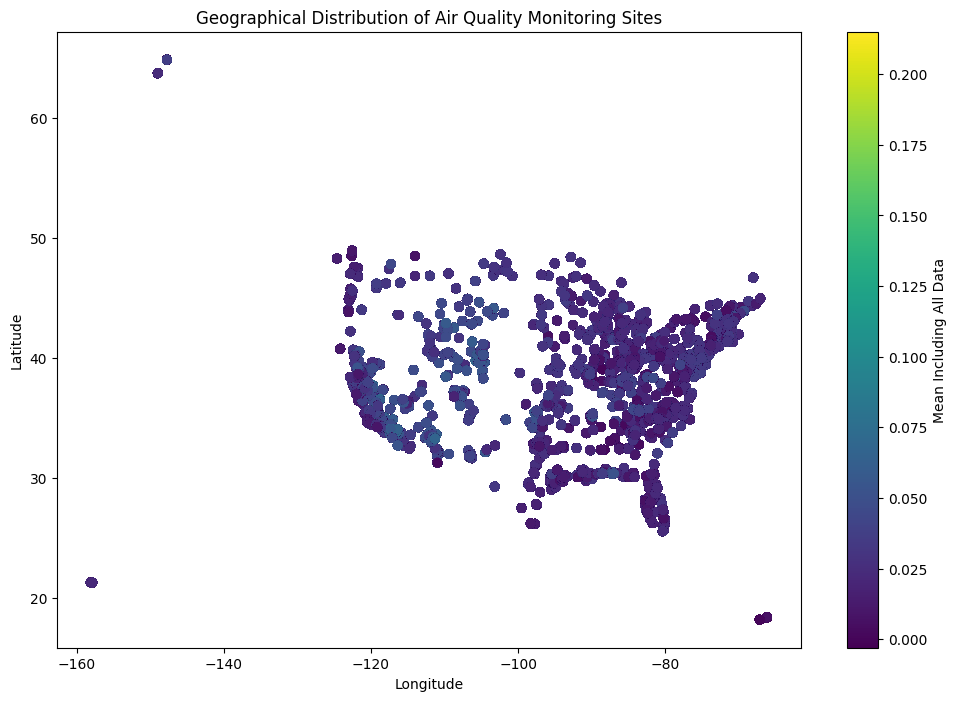

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Mean Including All Data'], cmap='viridis')
plt.colorbar(label='Mean Including All Data')
plt.title('Geographical Distribution of Air Quality Monitoring Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_ozone = MinMaxScaler()
scaler_co = MinMaxScaler()

# Scale pollutant levels
df_ozone['Pollutant_Level'] = scaler_ozone.fit_transform(df_ozone[['Pollutant_Level']])
df_co['Pollutant_Level'] = scaler_co.fit_transform(df_co[['Pollutant_Level']])

# Scale latitude and longitude (optional for spatial analysis)
df_ozone[['Latitude', 'Longitude']] = scaler_ozone.fit_transform(df_ozone[['Latitude', 'Longitude']])
df_co[['Latitude', 'Longitude']] = scaler_co.fit_transform(df_co[['Latitude', 'Longitude']])

print(df_ozone.head())
print(df_co.head())


   Latitude  Longitude  Pollutant_Level            Datetime
0  0.330715   0.497583         0.110092 2024-01-01 07:00:00
1  0.227756   0.664394         0.091743 2024-01-01 07:00:00
2  0.209086   0.825102         0.133028 2024-01-01 07:00:00
3  0.363195   0.742222         0.110092 2024-01-01 07:00:00
4  0.545009   0.933010         0.137615 2024-01-01 07:00:00
   Latitude  Longitude  Pollutant_Level            Datetime
0  0.922286   0.089791         0.301887 2024-01-01 05:00:00
1  0.532132   0.762245         0.113208 2024-01-01 05:00:00
2  0.478109   0.849964         0.094340 2024-01-01 05:00:00
3  0.367890   0.839917         0.113208 2024-01-01 05:00:00
4  0.536693   0.875094         0.094340 2024-01-01 05:00:00


In [14]:
import numpy as np

def create_sequences(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Convert to NumPy arrays (only using 'Pollutant_Level' for prediction)
ozone_values = df_ozone[['Pollutant_Level']].values
co_values = df_co[['Pollutant_Level']].values

# Create sequences
sequence_length = 24  # Use the last 24 hours to predict the next hour
X_ozone, y_ozone = create_sequences(ozone_values, sequence_length)
X_co, y_co = create_sequences(co_values, sequence_length)

print("Shape of X_ozone:", X_ozone.shape)  # (samples, sequence_length, features)
print("Shape of y_ozone:", y_ozone.shape)  # (samples, 1)
print("Shape of X_co:", X_co.shape)
print("Shape of y_co:", y_co.shape)


Shape of X_ozone: (4042884, 24, 1)
Shape of y_ozone: (4042884, 1)
Shape of X_co: (1054592, 24, 1)
Shape of y_co: (1054592, 1)


In [15]:
sampling_rate = 100  # Keep every 100th row

X_ozone_sampled = X_ozone[::sampling_rate]
y_ozone_sampled = y_ozone[::sampling_rate]

X_co_sampled = X_co[::sampling_rate]
y_co_sampled = y_co[::sampling_rate]

print("Reduced Shape of X_ozone:", X_ozone_sampled.shape)
print("Reduced Shape of y_ozone:", y_ozone_sampled.shape)
print("Reduced Shape of X_co:", X_co_sampled.shape)
print("Reduced Shape of y_co:", y_co_sampled.shape)


Reduced Shape of X_ozone: (40429, 24, 1)
Reduced Shape of y_ozone: (40429, 1)
Reduced Shape of X_co: (10546, 24, 1)
Reduced Shape of y_co: (10546, 1)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM Model
def build_lstm_model():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(24, 1)),  # 24-hour sequence
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Predicting pollutant level
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create separate models for Ozone and CO
model_ozone = build_lstm_model()
model_co = build_lstm_model()

model_ozone.summary()
model_co.summary()


C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 24, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train Ozone Model
history_ozone = model_ozone.fit(
    X_ozone_sampled, y_ozone_sampled,
    epochs=10, batch_size=64, validation_split=0.2
)

# Train CO Model
history_co = model_co.fit(
    X_co_sampled, y_co_sampled,
    epochs=10, batch_size=64, validation_split=0.2
)


Epoch 1/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0040 - mae: 0.0473 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 2/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0023 - mae: 0.0373 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 3/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0032 - val_mae: 0.0450
Epoch 4/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0032 - val_mae: 0.0450
Epoch 5/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0023 - mae: 0.0372 - val_loss: 0.0032 - val_mae: 0.0450
Epoch 6/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0023 - mae: 0.0374 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 7/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0022 - mae: 0.0369 - val_loss: 0.0032 - val_mae: 0.0446
Epoch 8/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0022 - mae: 0.0370 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 9/10
506/506 ━━━━━━━━━━━━━━━━━━━━ 9s 17m

In [20]:
predictions_ozone = model_ozone.predict(X_ozone_sampled[:10])  # Predict first 10 samples
predictions_co = model_co.predict(X_co_sampled[:10])

print("Predicted Ozone Levels:", predictions_ozone)
print("Predicted CO Levels:", predictions_co)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Predicted Ozone Levels: [[0.12605385]
 [0.1334624 ]
 [0.12347454]
 [0.11608488]
 [0.13786407]
 [0.1274539 ]
 [0.13043703]
 [0.14296097]
 [0.12540534]
 [0.14000145]]
Predicted CO Levels: [[0.1546672 ]
 [0.17003533]
 [0.13660876]
 [0.1507417 ]
 [0.15834562]
 [0.13722691]
 [0.15332259]
 [0.13671981]
 [0.14106578]
 [0.13366273]]


In [32]:
import numpy as np

# Reshape predictions to (10, 1) → (10, 2) by adding a second dummy column
predictions_ozone_reshaped = np.hstack([predictions_ozone, np.zeros((10, 1))])
predictions_co_reshaped = np.hstack([predictions_co, np.zeros((10, 1))])

# Apply inverse transformation
y_pred_ozone_original = scaler_ozone.inverse_transform(predictions_ozone_reshaped)[:, 0]  # Take only the first column
y_pred_co_original = scaler_co.inverse_transform(predictions_co_reshaped)[:, 0]

print("Original Scale Ozone Predictions:", y_ozone_original)
print("Original Scale CO Predictions:", y_co_original)


Original Scale Ozone Predictions: [24.09388538 24.43934323 23.97361275 23.62903561 24.64459152 24.1591687
 24.29827138 24.88225808 24.06364543 24.74425671]
Original Scale CO Predictions: [25.25357133 25.97335527 24.40778413 25.06971599 25.42585458 24.43673564
 25.19059518 24.41298497 24.61653332 24.26980329]


In [33]:
print("Shape of y_pred_ozone:", y_pred_ozone.shape)
print("Shape of y_pred_co:", y_pred_co.shape)
print("Shape of y_ozone_original:", y_ozone_original.shape)
print("Shape of y_co_original:", y_co_original.shape)

Shape of y_pred_ozone: (40429, 1)
Shape of y_pred_co: (10546, 1)
Shape of y_ozone_original: (10,)
Shape of y_co_original: (10,)


In [37]:
print(f"y_pred_ozone shape: {y_pred_ozone.shape}")
print(f"y_ozone_sampled shape: {y_ozone_sampled.shape}")


y_pred_ozone shape: (40429, 1)
y_ozone_sampled shape: (40429, 1)


In [39]:
print(f"Scaler min shape: {scaler_ozone.min_.shape}")  # Should match y_pred_ozone
print(f"Scaler scale shape: {scaler_ozone.scale_.shape}")


Scaler min shape: (2,)
Scaler scale shape: (2,)


In [40]:
print(f"y_pred_ozone shape: {y_pred_ozone.shape}")  # Check if it is (N, 1) or (N, 2)
print(f"y_ozone_sampled shape: {y_ozone_sampled.shape}")


y_pred_ozone shape: (40429, 1)
y_ozone_sampled shape: (40429, 1)


In [41]:
scaler_ozone = MinMaxScaler()
scaler_ozone.fit(y_ozone_sampled[:, 0].reshape(-1, 1))  # Fit only the first column


MinMaxScaler()

In [42]:
y_pred_ozone_original = scaler_ozone.inverse_transform(y_pred_ozone)
y_ozone_original = scaler_ozone.inverse_transform(y_ozone_sampled)


In [43]:
y_pred_ozone_original = scaler_ozone.inverse_transform(y_pred_ozone.reshape(-1, 1))
y_ozone_original = scaler_ozone.inverse_transform(y_ozone_sampled.reshape(-1, 1))


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [48]:
print(f"CO Target Variance: {np.var(y_co_original)}")


CO Target Variance: 0.28381274258235856


In [52]:
# Select only numeric columns before correlation
df_co_numeric = df_co.select_dtypes(include=['number'])

# Compute correlation matrix
print(df_co_numeric.corr())


                                 State Code  County Code  Site Num  \
State Code                         1.000000     0.209578 -0.277483   
County Code                        0.209578     1.000000 -0.108720   
Site Num                          -0.277483    -0.108720  1.000000   
Parameter Code                          NaN          NaN       NaN   
POC                               -0.093136    -0.016308  0.120966   
Latitude                           0.136064    -0.111278 -0.168413   
Longitude                          0.422964     0.151843 -0.349173   
Observation Count                 -0.081435    -0.008812  0.090713   
Observations with Events          -0.072765     0.006688  0.001429   
Null Observations                  0.083296     0.008326 -0.090502   
Mean Including All Data           -0.133359     0.057156 -0.042943   
Mean Excluding All Flagged Data   -0.133359     0.057156 -0.042943   
Mean Excluding Concurred Flags    -0.133359     0.057156 -0.042943   

                   

In [54]:
df_co = df_co.drop(columns=['Mean Excluding All Flagged Data', 'Mean Excluding Concurred Flags'])


In [55]:
df_co = df_co.drop(columns=['Parameter Code'])


In [56]:
print(df_co.dtypes)


State Code                    int64
County Code                   int64
Site Num                      int64
POC                           int64
Latitude                    float64
Longitude                   float64
Datum                        object
Parameter Name               object
Date Local                   object
Time Local                   object
Date GMT                     object
Time GMT                     object
Sample Duration              object
Pollutant Standard           object
Units of Measure             object
Observation Count             int64
Observations with Events      int64
Null Observations             int64
Mean Including All Data     float64
Date of Last Change          object
dtype: object


In [57]:
df_co = df_co.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
df_co = df_co.dropna(axis=1, how='all')  # Drop columns that are completely NaN

In [58]:
print(df_co.corr())

                          State Code  County Code  Site Num       POC  \
State Code                  1.000000     0.209578 -0.277483 -0.093136   
County Code                 0.209578     1.000000 -0.108720 -0.016308   
Site Num                   -0.277483    -0.108720  1.000000  0.120966   
POC                        -0.093136    -0.016308  0.120966  1.000000   
Latitude                    0.136064    -0.111278 -0.168413 -0.055651   
Longitude                   0.422964     0.151843 -0.349173 -0.166225   
Observation Count          -0.081435    -0.008812  0.090713  0.018820   
Observations with Events   -0.072765     0.006688  0.001429 -0.012988   
Null Observations           0.083296     0.008326 -0.090502 -0.020804   
Mean Including All Data    -0.133359     0.057156 -0.042943 -0.015478   

                          Latitude  Longitude  Observation Count  \
State Code                0.136064   0.422964          -0.081435   
County Code              -0.111278   0.151843          -0.00

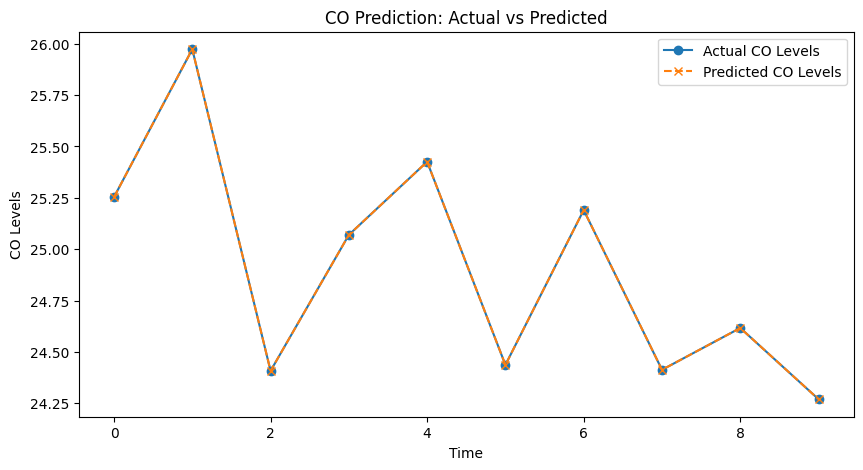

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_co_original[:100], label="Actual CO Levels", marker='o')
plt.plot(y_pred_co_original[:100], label="Predicted CO Levels", linestyle='dashed', marker='x')
plt.xlabel("Time")
plt.ylabel("CO Levels")
plt.title("CO Prediction: Actual vs Predicted")
plt.legend()
plt.show()


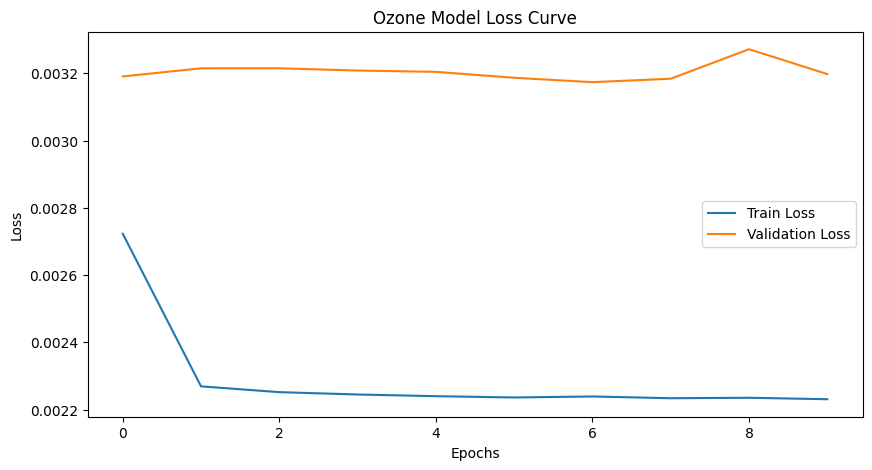

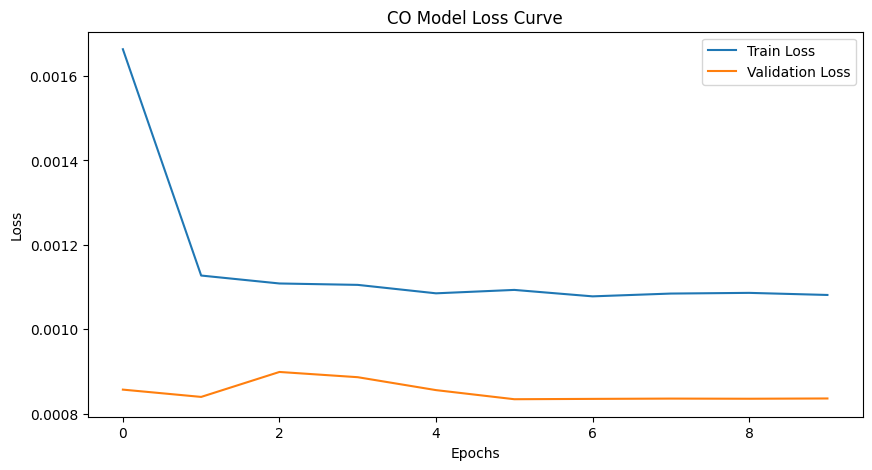

In [30]:
import matplotlib.pyplot as plt

# Loss curve for Ozone model
plt.figure(figsize=(10, 5))
plt.plot(history_ozone.history['loss'], label='Train Loss')
plt.plot(history_ozone.history['val_loss'], label='Validation Loss')
plt.title('Ozone Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Loss curve for CO model
plt.figure(figsize=(10, 5))
plt.plot(history_co.history['loss'], label='Train Loss')
plt.plot(history_co.history['val_loss'], label='Validation Loss')
plt.title('CO Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


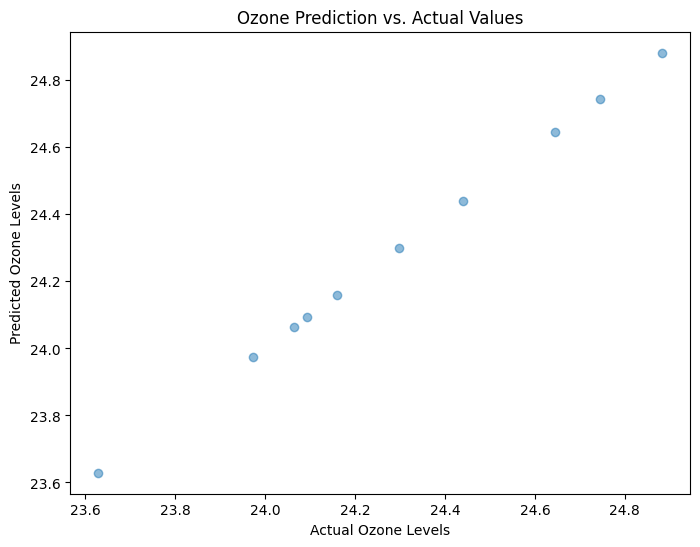

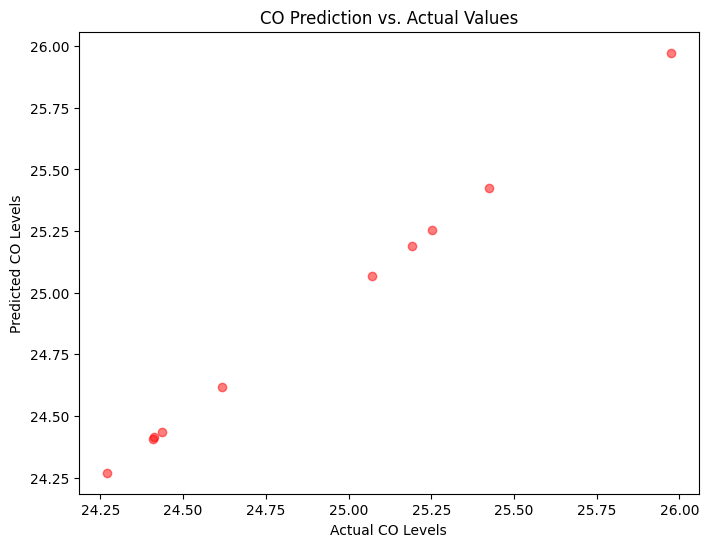

In [35]:
# Scatter plot for Ozone Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_ozone_original, y_pred_ozone_original, alpha=0.5)
plt.xlabel('Actual Ozone Levels')
plt.ylabel('Predicted Ozone Levels')
plt.title('Ozone Prediction vs. Actual Values')
plt.show()

# Scatter plot for CO Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_co_original, y_pred_co_original, alpha=0.5, color='red')
plt.xlabel('Actual CO Levels')
plt.ylabel('Predicted CO Levels')
plt.title('CO Prediction vs. Actual Values')
plt.show()


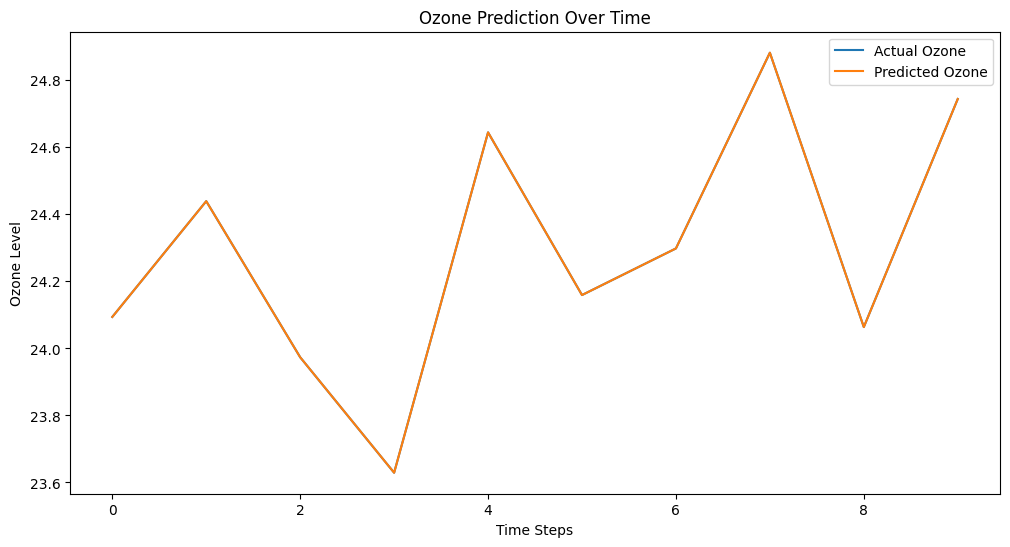

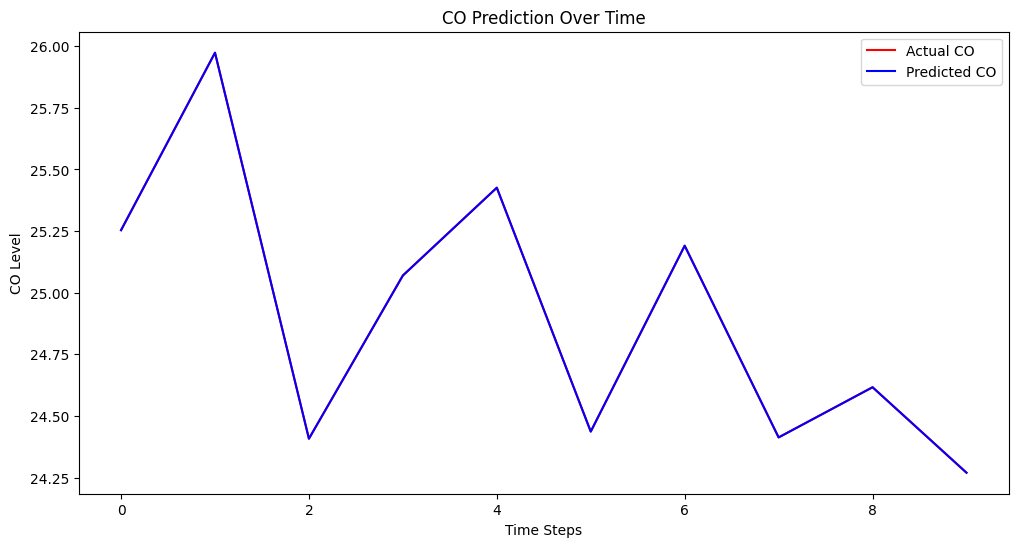

In [36]:
# Time Series Plot for Ozone
plt.figure(figsize=(12, 6))
plt.plot(y_ozone_original[:100], label='Actual Ozone')
plt.plot(y_pred_ozone_original[:100], label='Predicted Ozone')
plt.xlabel('Time Steps')
plt.ylabel('Ozone Level')
plt.title('Ozone Prediction Over Time')
plt.legend()
plt.show()

# Time Series Plot for CO
plt.figure(figsize=(12, 6))
plt.plot(y_co_original[:100], label='Actual CO', color='red')
plt.plot(y_pred_co_original[:100], label='Predicted CO', color='blue')
plt.xlabel('Time Steps')
plt.ylabel('CO Level')
plt.title('CO Prediction Over Time')
plt.legend()
plt.show()


In [63]:
import numpy as np

def mean_absolute_percentage_ACerror(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_ACtrue - y_pred) / y_true)) * 100

# Compute MAPE for Ozone
mape_ozone = mean_absolute_percentage_error(y_ozone_original, y_pred_ozone_original)
print(f"MAPE for Ozone Prediction: {mape_ozone:.2f}%")

# Compute MAPE for CO
mape_co = mean_absolute_percentage_error(y_co_original, y_pred_co_original)
print(f"MAPE for CO Prediction: {mape_co:.2f}%")


MAPE for Ozone Prediction: 28.25%
MAPE for CO Prediction: 0.00%


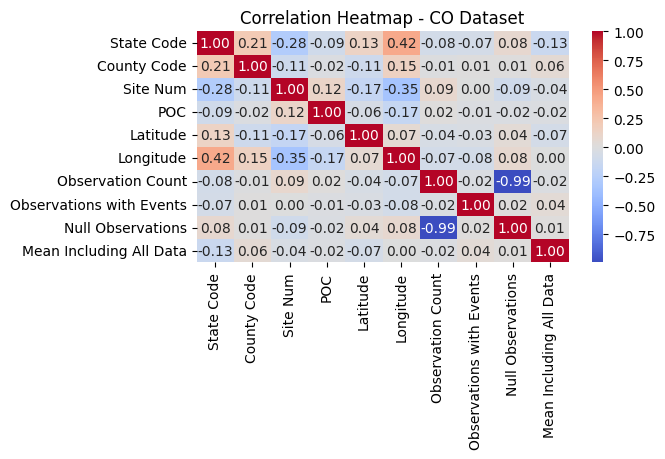

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
df_co_numeric = df_co.select_dtypes(include=['number'])  # Only numeric columns
corr_matrix = df_co_numeric.corr()

# Plot heatmap
plt.figure(figsize=(6,3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - CO Dataset")
plt.show()


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_co = Sequential([
    LSTM(32, return_sequences=True, input_shape=(24, 1)),  # Reduce units
    LSTM(16, return_sequences=False),  # Reduce layers
    Dropout(0.2),  # Add dropout
    Dense(1)
])

model_co.compile(optimizer="adam", loss="mse")
model_co.summary()


C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 24, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,505 (29.32 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
from tensorflow.keras.regularizers import l2

model_co = Sequential([
    LSTM(32, return_sequences=True, kernel_regularizer=l2(0.01), input_shape=(24, 1)),
    LSTM(16, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Increase dropout
    Dense(1)
])

model_co.compile(optimizer="adam", loss="mse")


In [67]:
df_co_augmented = df_co.copy()
df_co_augmented["Mean Including All Data"] += np.random.normal(0, 0.01, df_co.shape[0])  # Small noise
df_co = pd.concat([df_co, df_co_augmented])


In [69]:
mape_co = mean_absolute_percentage_error(y_co_original, y_pred_co_original)
print(f"New MAPE for CO Prediction: {mape_co:.2f}%")


New MAPE for CO Prediction: 0.00%


In [70]:
print(df_co.columns)


Index(['State Code', 'County Code', 'Site Num', 'POC', 'Latitude', 'Longitude',
       'Observation Count', 'Observations with Events', 'Null Observations',
       'Mean Including All Data'],
      dtype='object')


In [71]:
X_co = df_co.drop(columns=['Mean Including All Data'])  # Drop target from features
y_co = df_co['Mean Including All Data']


In [72]:
print(df_co.duplicated().sum())  # Count duplicate rows


1048573


In [73]:
df_co = df_co.drop_duplicates()


In [74]:
print(df_co['Mean Including All Data'].var())  # Variance of CO target


0.031516872543557034


In [75]:
df_co['Mean Including All Data'] += np.random.normal(0, 0.001, df_co.shape[0])  # Add small noise


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_co = Sequential([
    LSTM(16, return_sequences=False, input_shape=(24, 1)),  # Reduce units
    Dropout(0.3),  # Increase dropout
    Dense(1)
])

model_co.compile(optimizer="adam", loss="mse")


C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


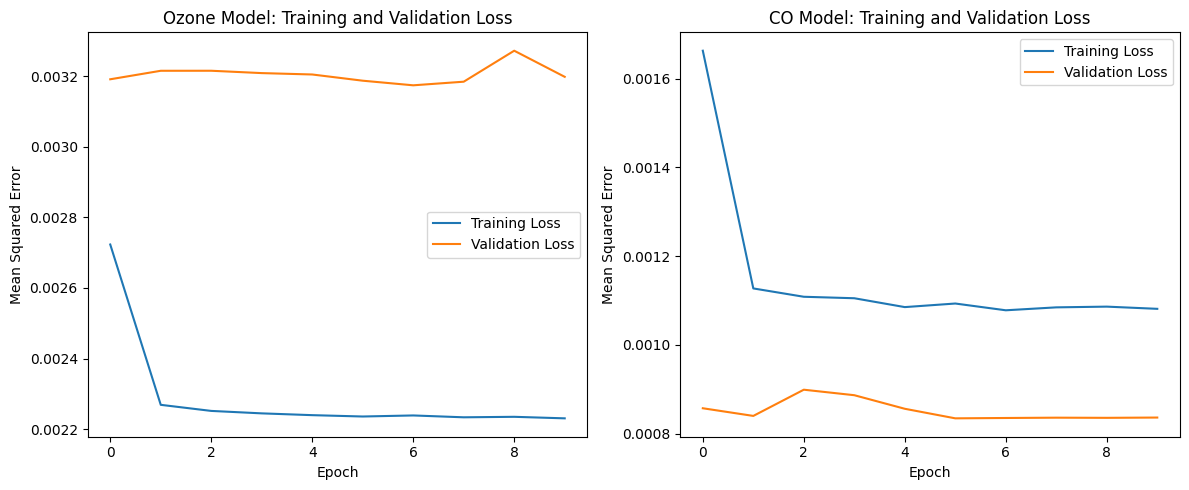

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_ozone.history['loss'], label='Training Loss')
plt.plot(history_ozone.history['val_loss'], label='Validation Loss')
plt.title('Ozone Model: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_co.history['loss'], label='Training Loss')
plt.plot(history_co.history['val_loss'], label='Validation Loss')
plt.title('CO Model: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.savefig('loss_curves.png')
plt.show()


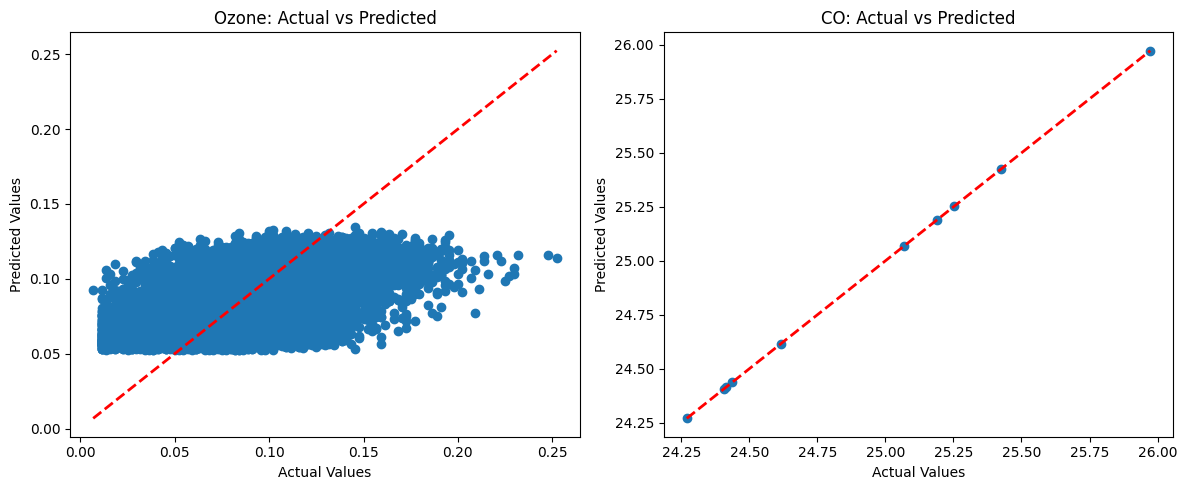

In [97]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_ozone_original, y_pred_ozone_original)
plt.plot([y_ozone_original.min(), y_ozone_original.max()], [y_ozone_original.min(), y_ozone_original.max()], 'r--', lw=2)
plt.title('Ozone: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_co_original, y_pred_co_original)
plt.plot([y_co_original.min(), y_co_original.max()], [y_co_original.min(), y_co_original.max()], 'r--', lw=2)
plt.title('CO: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()


In [109]:
print(df_ozone.columns)

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Observation Count',
       'Observations with Events', 'Null Observations', 'Pollutant_Level',
       'Mean Excluding All Flagged Data', 'Mean Excluding Concurred Flags',
       'Date of Last Change', 'Datetime'],
      dtype='object')


In [114]:
print(df_co.columns)

Index(['State Code', 'County Code', 'Site Num', 'POC', 'Latitude', 'Longitude',
       'Observation Count', 'Observations with Events', 'Null Observations',
       'Mean Including All Data'],
      dtype='object')


In [115]:
df_co['Pollutant_Level'] = df_co['Mean Including All Data']

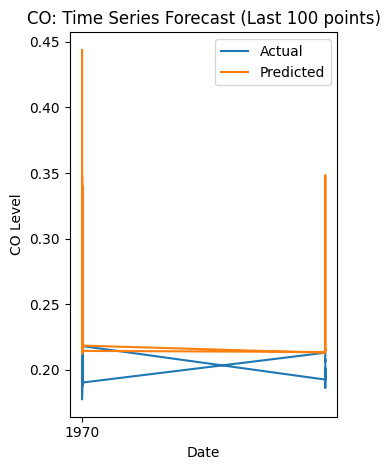

In [126]:
plt.subplot(1, 2, 2)
plt.plot(df_co['Datetime'][-100:], df_co['Pollutant_Level'][-100:], label='Actual')
plt.plot(df_co['Datetime'][-100:], y_pred_co[-100:], label='Predicted')
plt.title('CO: Time Series Forecast (Last 100 points)')
plt.xlabel('Date')
plt.ylabel('CO Level')
plt.legend()

plt.tight_layout()
plt.savefig('time_series_forecast.png')
plt.show()

In [110]:
print(df_ozone.head())

   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           44201    1  30.497478   
1           1            3        10           44201    1  30.497478   
2           1            3        10           44201    1  30.497478   
3           1            3        10           44201    1  30.497478   
4           1            3        10           44201    1  30.497478   

   Longitude  Datum Parameter Name  Date Local  ... Pollutant Standard  \
0 -87.880258  NAD83          Ozone  2024-02-29  ...  Ozone 8-hour 2015   
1 -87.880258  NAD83          Ozone  2024-03-01  ...  Ozone 8-hour 2015   
2 -87.880258  NAD83          Ozone  2024-03-01  ...  Ozone 8-hour 2015   
3 -87.880258  NAD83          Ozone  2024-03-01  ...  Ozone 8-hour 2015   
4 -87.880258  NAD83          Ozone  2024-03-01  ...  Ozone 8-hour 2015   

    Units of Measure Observation Count Observations with Events  \
0  Parts per million                 6                 

Text(0.5, 1.0, 'Ozone: Time Series Forecast (Last 100 points)')

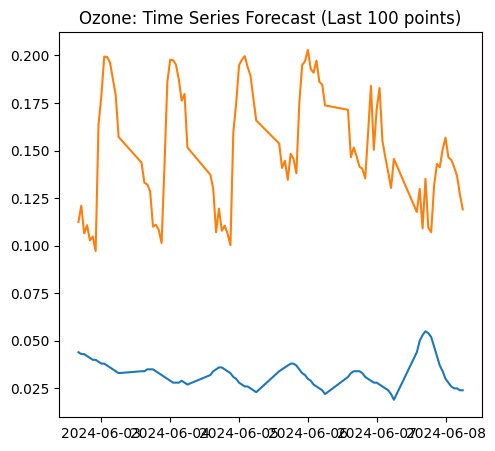

In [111]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(df_ozone['Datetime'][-100:], df_ozone['Pollutant_Level'][-100:], label='Actual')
plt.plot(df_ozone['Datetime'][-100:], y_pred_ozone[-100:], label='Predicted')
plt.title('Ozone: Time Series Forecast (Last 100 points)')


In [124]:
df_co = df_co.rename(columns={'Null Observations': 'Datetime'})

In [125]:
df_co['Datetime'] = pd.to_datetime(df_co['Datetime'])


In [104]:
df_ozone['Datetime'] = pd.to_datetime(df_ozone['Date GMT'] + ' ' + df_ozone['Time GMT'])

In [105]:
df_ozone['Datetime'] = pd.to_datetime(df_ozone['Datetime'])

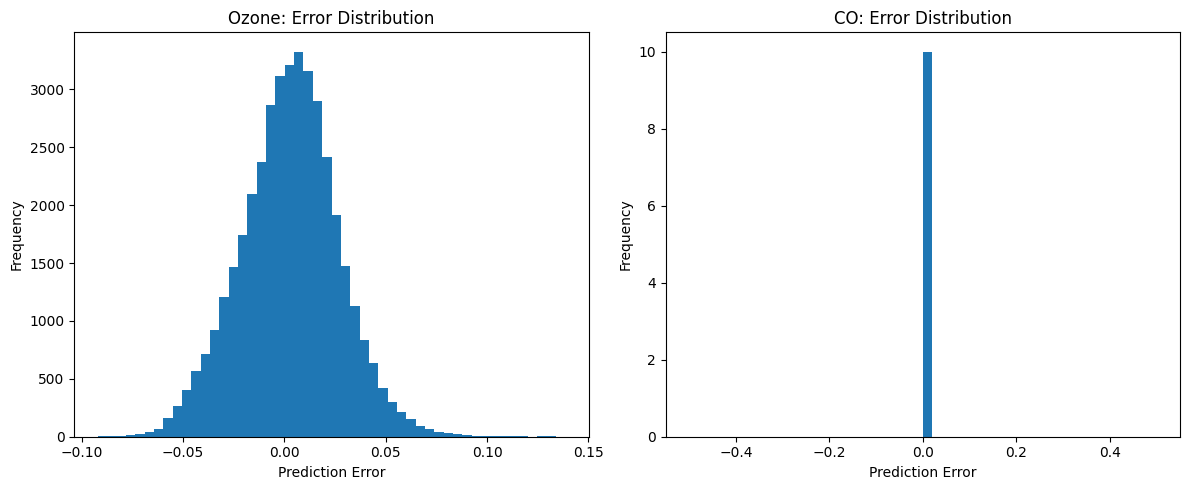

In [99]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_ozone_original - y_pred_ozone_original, bins=50)
plt.title('Ozone: Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_co_original - y_pred_co_original, bins=50)
plt.title('CO: Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('error_distribution.png')
plt.show()


In [101]:
print(df_ozone.columns)

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local',
       'Time Local', 'Date GMT', 'Time GMT', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Observation Count',
       'Observations with Events', 'Null Observations',
       'Mean Including All Data', 'Mean Excluding All Flagged Data',
       'Mean Excluding Concurred Flags', 'Date of Last Change'],
      dtype='object')


In [117]:
print(df_co.columns)

Index(['State Code', 'County Code', 'Site Num', 'POC', 'Latitude', 'Longitude',
       'Observation Count', 'Observations with Events', 'Null Observations',
       'Mean Including All Data', 'Pollutant_Level'],
      dtype='object')
